In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import b_value_functions1 as b_value_functions # these are the functions in the .py file 
from datetime import datetime
import statistics

In [2]:
# Read in the example catalog 
catalog = pd.read_csv(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe (2)\Yihe\Yihe\COOPER\COOPER2003\Cooper 2003 v2.csv")
#catalog = pd.read_csv(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe (2)/Yihe/Yihe/COOPER/COOPER2003/Cooper 2003 v2.csv')

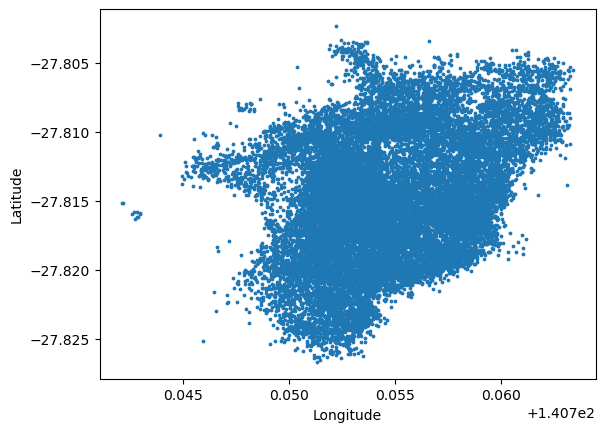

In [3]:
plt.scatter(catalog["Long"],catalog["Lat"],s=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

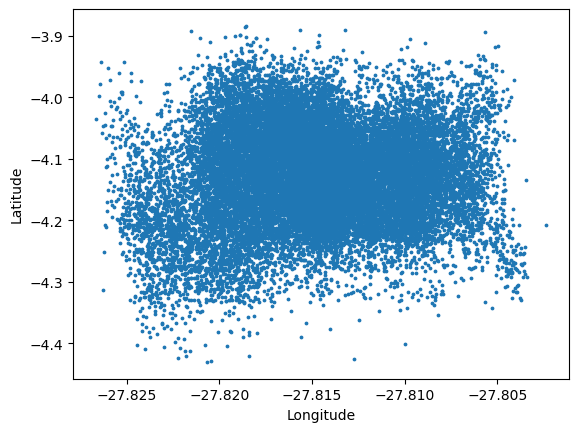

In [4]:
plt.scatter(catalog["Lat"],catalog["Elevation"],s=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [5]:
# Inj St -0.738389815
# Inj End 32.65049907

injSt = -0.738389815
injEnd = 32.65049907 - injSt
print(injEnd)

dt = np.array(catalog['TimeN'].copy()) - injSt
# Filters all arrays according to injection start and end dates, chatgpt assisted
dtF, magF, xf, yf, depf,  = zip(*[
    (d, m, x, y, dp)
    for d, m, x, y, dp in zip(dt, catalog['ML'], catalog['X'], catalog['Y'], catalog['Z'])
    if injSt-injSt <= d <= injEnd   ########## don't cut the magnitudes vs cut the magnitudes due to weird distribution->and m<1
])
print(len(magF),len(dt))

33.388888885
20597 23285


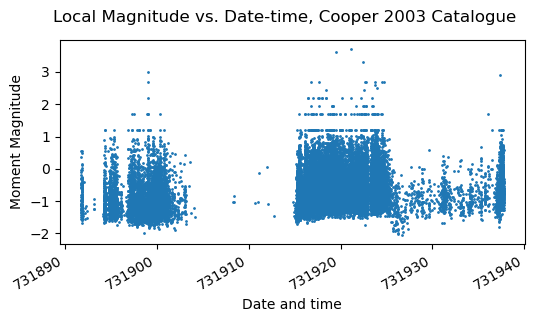

In [6]:


#cut off magnitudes above 1 or 1.15 due to weird clustering, might assume that it's a magnitude type change

figure = plt.figure(figsize = [6,3])
ax1 = figure.add_subplot(111)
ax1.scatter(catalog["Time"],catalog["ML"],s=1)
figure.suptitle("Local Magnitude vs. Date-time, Cooper 2003 Catalogue")
ax1.set_xlabel("Date and time")
ax1.set_ylabel("Moment Magnitude")
#ax1.set_xlim([datetime(2004,9,13),datetime(2004,9,25)])
figure.autofmt_xdate()
plt.show()

In [7]:
xref = statistics.median(xf[0:10])
yref = statistics.median(yf[0:10])
zref = statistics.median(depf[0:10])
print(xref,yref,zref)

-14.0 57.0 -4157.0


In [8]:
dist = np.sqrt((np.array(xf)-xref)**2+(np.array(yf)-yref)**2+(np.array(depf)-zref)**2)

In [9]:
def quicksort_with_swaps(arr1, arr2, low, high):
    if low < high:
        # Partition the arrays and get the pivot index
        pivot_index = partition(arr1, arr2, low, high)

        # Recursively sort the subarrays on both arrays
        quicksort_with_swaps(arr1, arr2, low, pivot_index)
        quicksort_with_swaps(arr1, arr2, pivot_index + 1, high)

def partition(arr1, arr2, low, high):
    # Choose the pivot as the middle element
    pivot = arr1[(low + high) // 2]
    i = low - 1
    j = high + 1

    while True:
        i += 1
        while arr1[i] < pivot:
            i += 1

        j -= 1
        while arr1[j] > pivot:
            j -= 1

        if i >= j:
            return j

        # Swap elements in both arrays
        arr1[i], arr1[j] = arr1[j], arr1[i]
        arr2[i], arr2[j] = arr2[j], arr2[i]

# Example usage:
array1 = [3, 1, 4, 1, 5, 9, 2, 6]
array2 = ['c', 'a', 'd', 'a', 'e', 'i', 'b', 'f']

quicksort_with_swaps(array1, array2, 0, len(array1) - 1)

print("Sorted array1:", array1)
print("Corresponding sorted array2:", array2)

Sorted array1: [1, 1, 2, 3, 4, 5, 6, 9]
Corresponding sorted array2: ['a', 'a', 'b', 'c', 'd', 'e', 'f', 'i']


In [10]:
# bin stuff
bins = np.arange(-2, 6, 0.1)
mid_bins = (bins[:-1] + bins[1:])/2

In [11]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    
    return quicksort(left) + middle + quicksort(right)

# Example usage:
my_array = [3, 6, 8, 10, 1, 2, 1]
sorted_array = quicksort(my_array)
print(sorted_array)

[1, 1, 2, 3, 6, 8, 10]


[]

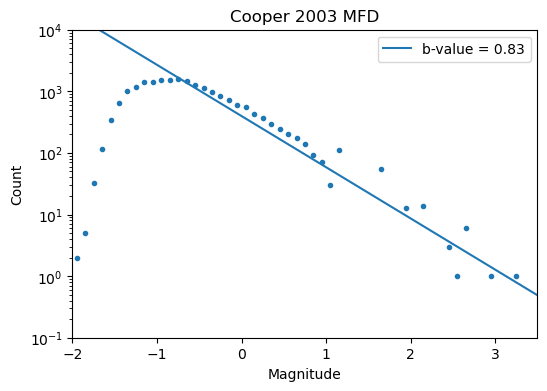

In [12]:
# Calculate b-value for the 'Mag_S' column 
bins = np.arange(-2, 6, 0.1)
MNew = np.array(magF)
b, Mc, hist = b_value_functions.btrad(MNew, bins, delta_b = 0.01)

x = bins
y_Mc = hist[0][np.argmax(hist[0])+2]
a = np.log10(y_Mc) + b*Mc

best_fit = 10**(a-b*x)


# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [6,4])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, hist[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-value = '+str(np.round(b,2)))

ax1.set_xlim([-2, 3.5])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('Cooper 2003 MFD')
plt.plot()

In [13]:
#make copy of distance array and an array referencing distance copy
dstc2 = dist.copy()
dstRef2=[]
for i in range(len(dstc2)):
    dstRef2.append(i)

In [14]:
print(len(dstc2))
print(len(dstRef2))

20597
20597


In [15]:
# sort distance array and sort reference array along with
quicksort_with_swaps(dstc2,dstRef2 , 0, len(dstc2) - 1)

In [16]:
# create 2d array to arrange shells of references based on distance
rDivs2=[[] for i in range(2)]
rDmaxRad2=[]
count=0
rpl=0
for i in range(len(dstc2)):
    if count <int(len(dstc2)/2)+1:
        rDivs2[rpl].append(dstRef2[i])
        count +=1
    if count ==int(len(dstc2)/2)+1:
        count = 0
        rpl+=1
        rDmaxRad2.append(dstc2[i])

In [17]:
# sort the reference array of each shell, making it so each shell is now ordered by date
sDivs2=[[] for i in range(2)]
for i in range(2):
    sDivs2[i]=quicksort(rDivs2[i])

In [18]:
rDmaxRad2.append(dstc2[len(dstc2)-1])
print(rDmaxRad2)

[np.float64(458.6992478738111), np.float64(1389.9046729902018)]


In [19]:
br2=[[] for i in range(2)]
bpr2=[[] for i in range(2)]
dtr2=[[] for i in range(2)]
lbr2=[[] for i in range(2)]
hbr2=[[] for i in range(2)]
stdr2=[[] for i in range(2)]
lbpr2=[[] for i in range(2)]
hbpr2=[[] for i in range(2)]
stdpr2=[[] for i in range(2)]
mxmr2=[[] for i in range(2)]
mxdr2=[[] for i in range(2)]

for i in range(2):
    print(i)
    
    for x in range(300,len(sDivs2[i]),30):
        mxt =[]
        mxm=-10
        md=0
        for j in range(x-300,x):
            mxt.append(MNew[sDivs2[i][j]])
            if mxt[-1]>mxm:
                mxm=mxt[-1]
                md=dtF[sDivs2[i][j]]
        mxT=np.array(mxt)
        mxmr2[i].append(mxm)
        mxdr2[i].append(md)
        b, Mc, hist = b_value_functions.btrad(mxT, bins, delta_b = 0.01)
        hist1, bP = b_value_functions.bpos(mxT)
        low_b, high_b, std = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'btrad', delta_b = 0.00001)    
        low_bp, high_bp, stdp = b_value_functions.bootstrap(mxT, np.arange(-2, 6, 0.1), 1000, 'bpos', delta_b = 0.00001)
        br2[i].append(b)
        dtr2[i].append(dtF[sDivs2[i][x]])
        bpr2[i].append(bP)
        lbr2[i].append(low_b)
        lbpr2[i].append(low_bp)
        hbr2[i].append(high_b)
        hbpr2[i].append(high_bp)
        stdr2[i].append(std)
        stdpr2[i].append(stdp)

0
1


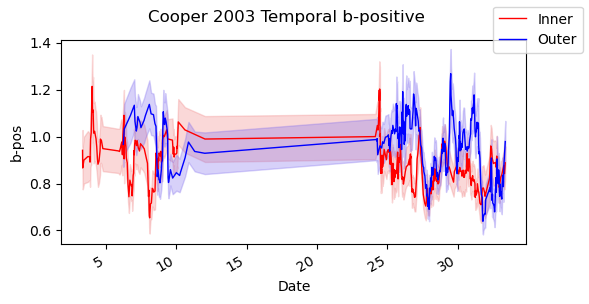

In [20]:
fig, ax1 = plt.subplots(figsize=(6,3))
fig.suptitle("Cooper 2003 Temporal b-positive")
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
#ax1.set_xlim([2,20])
#ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
ax1.set_xlabel('Date')
fig.autofmt_xdate()
fig.legend(loc = 'upper right')
plt.show()

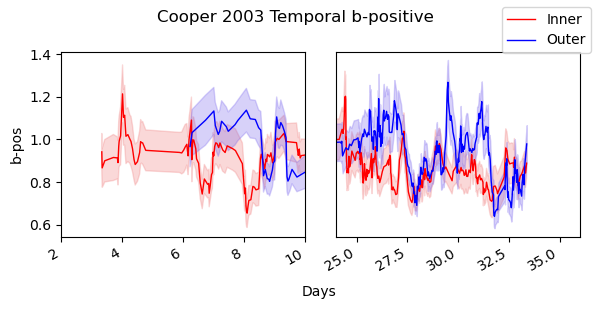

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
fig.suptitle("Cooper 2003 Temporal b-positive")
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax1.set_xlim([2,10])

ax2.plot(dtr2[0],bpr2[0],color="red",linewidth=1)
ax2.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax2.plot(dtr2[1],bpr2[1],color="blue",linewidth=1)
ax2.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax2.set_xlim([24,36])
#ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-pos')
#ax1.set_xlabel('Date')
ax2.set_ylabel('')  # Remove y-axis label
ax2.set_yticks([])  # Remove y-axis ticks
ax2.yaxis.set_visible(False)  # Hide y-axis
fig.autofmt_xdate()
fig.legend(loc = 'upper right')
fig.text(0.54, 0.04, 'Days', ha='center', va='center')

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Leave space for the x-axis label
#plt.tight_layout()
plt.show()


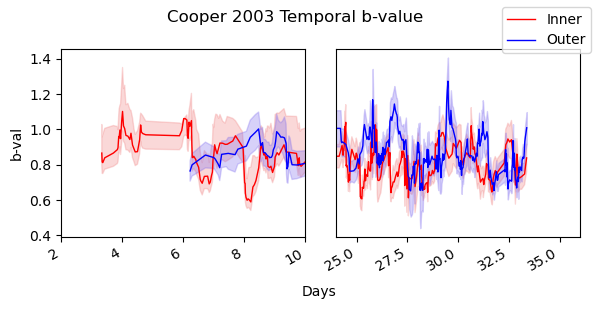

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
fig.suptitle("Cooper 2003 Temporal b-value")
ax1.plot(dtr2[0],br2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(br2[0],stdr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],br2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(br2[1],stdr2[1]), np.add(br2[1],stdr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax1.set_xlim([2,10])

ax2.plot(dtr2[0],br2[0],color="red",linewidth=1)
ax2.fill_between(dtr2[0], np.subtract(br2[0],stdr2[0]), np.add(br2[0],stdr2[0]), alpha = 0.3, color = 'lightcoral')
ax2.plot(dtr2[1],br2[1],color="blue",linewidth=1)
ax2.fill_between(dtr2[1], np.subtract(br2[1],stdr2[1]), np.add(br2[1],stdr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax2.set_xlim([24,36])
#ax1.set_ylim([1,2])
fig.autofmt_xdate()
ax1.set_ylabel('b-val')
#ax1.set_xlabel('Date')
ax2.set_ylabel('')  # Remove y-axis label
ax2.set_yticks([])  # Remove y-axis ticks
ax2.yaxis.set_visible(False)  # Hide y-axis
fig.autofmt_xdate()
fig.legend(loc = 'upper right')
fig.text(0.54, 0.04, 'Days', ha='center', va='center')

# Adjust layout
plt.tight_layout(rect=[0, 0.05, 1, 1])  # Leave space for the x-axis label
#plt.tight_layout()
plt.show()


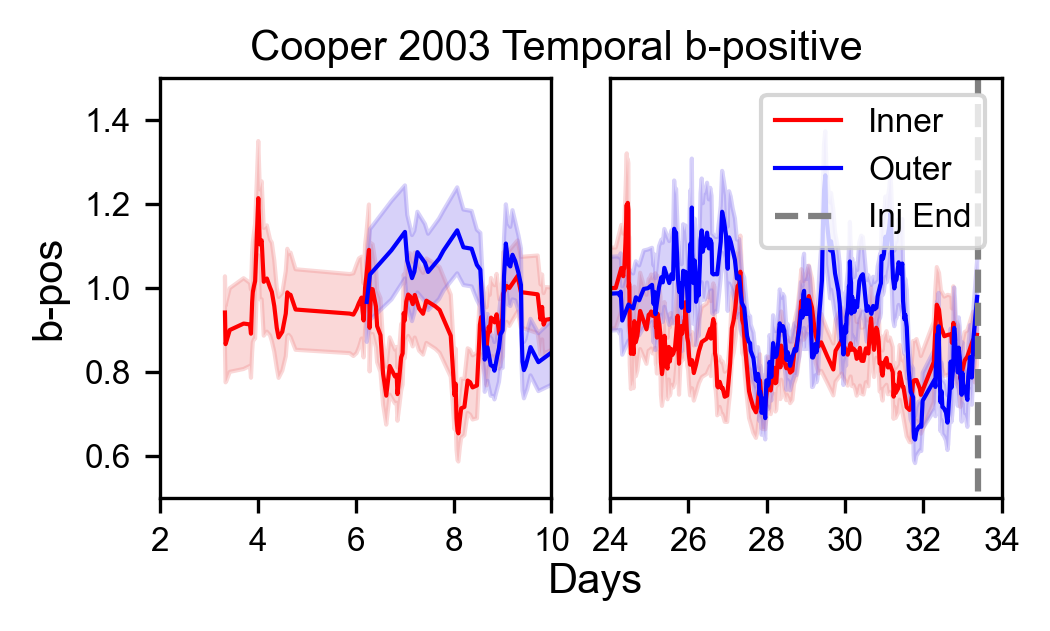

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(3.3, 2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
fig.suptitle("Cooper 2003 Temporal b-positive",fontsize=10)
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')



ax1.set_xlim([2,10])
ax1.tick_params(axis='x', labelsize=8) 
ax1.tick_params(axis='y', labelsize=8)
ax1.set_xticks(np.linspace(2, 10, 5))

ax2.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax2.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax2.plot(dtr2[1],bpr2[1],color="blue",linewidth=1,label='Outer')
ax2.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax2.set_xlim([24,34])
ax2.tick_params(axis='x', labelsize=8)
ax2.set_xticks(np.linspace(24, 34, 6))
ax2.vlines(injEnd,0.2,3.6,colors='grey',linestyles='--',label='Inj End')
ax1.set_ylim([0.5,1.5])
ax2.set_ylim([0.5,1.5])
#fig.autofmt_xdate()
ax1.set_ylabel('b-pos',fontsize=10)
#ax1.set_xlabel('Date')
ax2.set_ylabel('')  # Remove y-axis label
ax2.set_yticks([])  # Remove y-axis ticks
ax2.yaxis.set_visible(False)  # Hide y-axis
#fig.autofmt_xdate()
ax2.legend(loc = 'upper right',fontsize=8)
fig.text(0.54, 0.06, 'Days', ha='center', va='center',fontsize=10)

# Adjust layout
plt.subplots_adjust(wspace=0.15, left=0.1, right=0.95, top=0.90, bottom=0.2)
#plt.tight_layout()
plt.show()
fig.savefig(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe\Manuscripting\IO Shell Resize\cooper 2003 full.png",bbox_inches='tight', pad_inches=0.05)

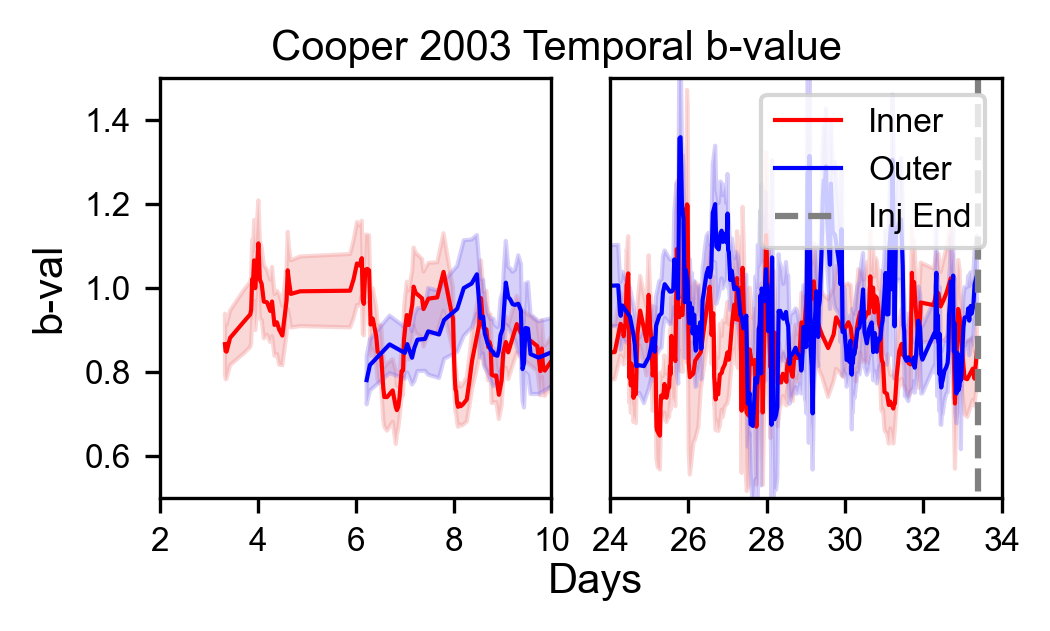

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(3.3, 2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
fig.suptitle("Cooper 2003 Temporal b-value",fontsize=10)
ax1.plot(dtr2[0],br2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(br2[0],stdr2[0]), np.add(br2[0],stdr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],br2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(br2[1],stdr2[1]), np.add(br2[1],stdr2[1]), alpha = 0.3, color = 'mediumslateblue')



ax1.set_xlim([2,10])
ax1.tick_params(axis='x', labelsize=8) 
ax1.tick_params(axis='y', labelsize=8)
ax1.set_xticks(np.linspace(2, 10, 5))

ax2.plot(dtr2[0],br2[0],color="red",linewidth=1,label='Inner')
ax2.fill_between(dtr2[0], np.subtract(br2[0],stdr2[0]), np.add(br2[0],stdr2[0]), alpha = 0.3, color = 'lightcoral')
ax2.plot(dtr2[1],br2[1],color="blue",linewidth=1,label='Outer')
ax2.fill_between(dtr2[1], np.subtract(br2[1],stdr2[1]), np.add(br2[1],stdr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax2.set_xlim([24,34])
ax2.tick_params(axis='x', labelsize=8)
ax2.set_xticks(np.linspace(24, 34, 6))
ax2.vlines(injEnd,0.2,3.6,colors='grey',linestyles='--',label='Inj End')
ax1.set_ylim([0.5,1.5])
ax2.set_ylim([0.5,1.5])
#fig.autofmt_xdate()
ax1.set_ylabel('b-val',fontsize=10)
#ax1.set_xlabel('Date')
ax2.set_ylabel('')  # Remove y-axis label
ax2.set_yticks([])  # Remove y-axis ticks
ax2.yaxis.set_visible(False)  # Hide y-axis
#fig.autofmt_xdate()
ax2.legend(loc = 'upper right',fontsize=8)
fig.text(0.54, 0.06, 'Days', ha='center', va='center',fontsize=10)

# Adjust layout
plt.subplots_adjust(wspace=0.15, left=0.1, right=0.95, top=0.90, bottom=0.2)
#plt.tight_layout()
plt.show()
#fig.savefig(r"D:\Yihe\Manuscripting\IO Shell Resize\cooper 2003 t4.png",bbox_inches='tight', pad_inches=0.05)

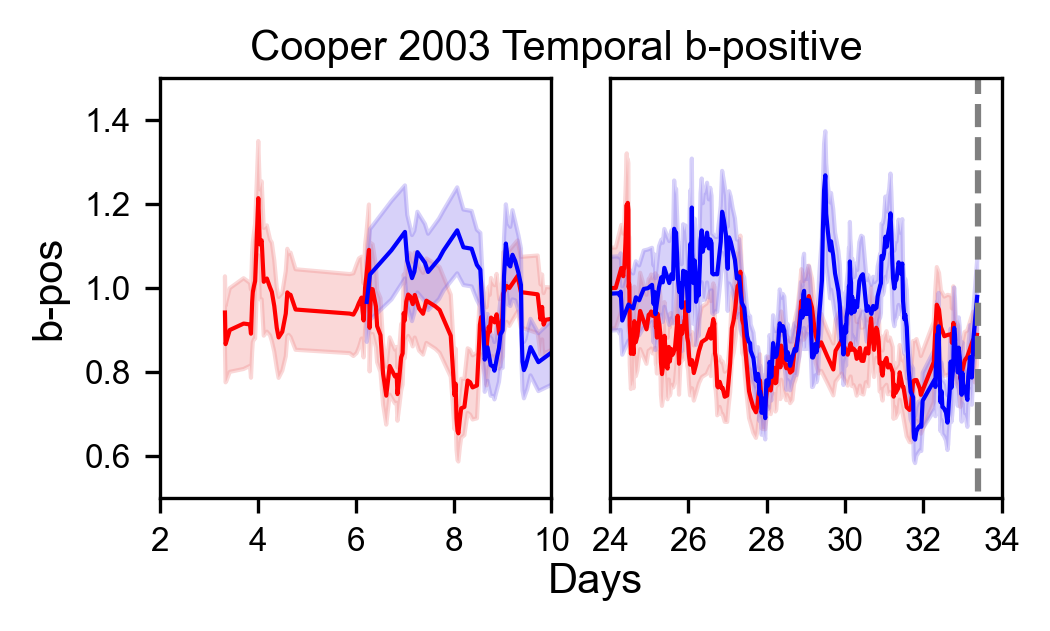

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(3.3, 2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
fig.suptitle("Cooper 2003 Temporal b-positive",fontsize=10)
ax1.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax1.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax1.plot(dtr2[1],bpr2[1],color="blue",linewidth=1, label='Outer')
ax1.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')



ax1.set_xlim([2,10])
ax1.tick_params(axis='x', labelsize=8) 
ax1.tick_params(axis='y', labelsize=8)
ax1.set_xticks(np.linspace(2, 10, 5))

ax2.plot(dtr2[0],bpr2[0],color="red",linewidth=1,label='Inner')
ax2.fill_between(dtr2[0], np.subtract(bpr2[0],stdpr2[0]), np.add(bpr2[0],stdpr2[0]), alpha = 0.3, color = 'lightcoral')
ax2.plot(dtr2[1],bpr2[1],color="blue",linewidth=1,label='Outer')
ax2.fill_between(dtr2[1], np.subtract(bpr2[1],stdpr2[1]), np.add(bpr2[1],stdpr2[1]), alpha = 0.3, color = 'mediumslateblue')
ax2.set_xlim([24,34])
ax2.tick_params(axis='x', labelsize=8)
ax2.set_xticks(np.linspace(24, 34, 6))
ax2.vlines(injEnd,0.2,3.6,colors='grey',linestyles='--',label='Inj End')
ax1.set_ylim([0.5,1.5])
ax2.set_ylim([0.5,1.5])
#fig.autofmt_xdate()
ax1.set_ylabel('b-pos',fontsize=10)
#ax1.set_xlabel('Date')
ax2.set_ylabel('')  # Remove y-axis label
ax2.set_yticks([])  # Remove y-axis ticks
ax2.yaxis.set_visible(False)  # Hide y-axis
#fig.autofmt_xdate()
#ax2.legend(loc = 'upper right',fontsize=8)
fig.text(0.54, 0.06, 'Days', ha='center', va='center',fontsize=10)

# Adjust layout
plt.subplots_adjust(wspace=0.15, left=0.1, right=0.95, top=0.90, bottom=0.2)
#plt.tight_layout()
plt.show()
fig.savefig(r"C:\Users\Matthew Salinas\OneDrive - University of Southern California\Yihe\Manuscripting\IO Shell Resize\cooper 2003 full sans legend.png",bbox_inches='tight', pad_inches=0.05)

In [29]:
# find max eq in both inner and outer shells
ioMax =[-10,-10]
for i in range(len(sDivs2[0])):
    if MNew[sDivs2[0][i]]>ioMax[0]:
        ioMax[0]=MNew[sDivs2[0][i]]
for i in range(len(sDivs2[1])):
    if MNew[sDivs2[1][i]]>ioMax[1]:
        ioMax[1]=MNew[sDivs2[1][i]]

print(ioMax)

[np.float64(3.7), np.float64(2.7)]


In [30]:
print(rDmaxRad2[0]/rDmaxRad2[1])

0.3300220920093595


[]

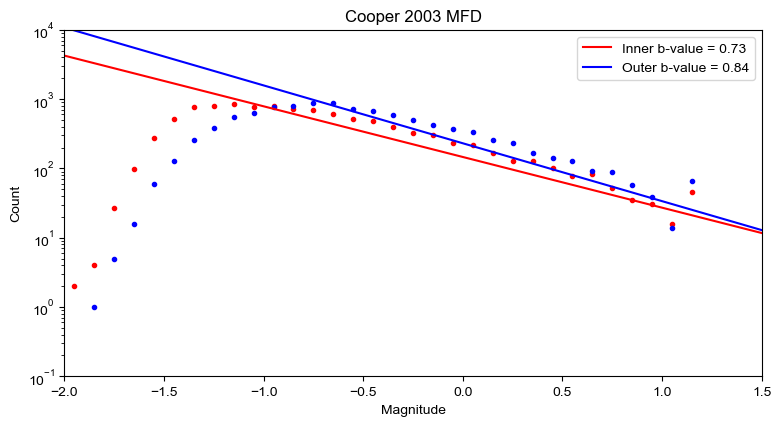

In [31]:
# Inner and Outer MFD for Matched Filter Basel 2006
inner=[]
outer=[]

for i in range(len(sDivs2[0])):
    inner.append(MNew[sDivs2[0][i]])
for i in range(len(sDivs2[1])):
    outer.append(MNew[sDivs2[1][i]])
    
bins = np.arange(-2, 6, 0.1)
bi, Mci, histi = b_value_functions.btrad(np.array(inner), bins, delta_b = 0.01)
bo, Mco, histo = b_value_functions.btrad(np.array(outer), bins, delta_b = 0.01)

x = bins
y_Mci = histi[0][np.argmax(histi[0])+2]
ai = np.log10(y_Mci) + bi*Mci

best_fiti = 10**(ai-bi*x)

x = bins
y_Mco = histo[0][np.argmax(histo[0])+2]
ao = np.log10(y_Mco) + bo*Mco
best_fito = 10**(ao-bo*x)

# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
figure = plt.figure(figsize = [9,4.5])
ax1 = figure.add_subplot(111)

ax1.scatter(mid_bins, histi[0], marker = '.',color='r')
ax1.plot(x, best_fiti, label = 'Inner b-value = '+str(np.round(bi,2)),color='r')

ax1.scatter(mid_bins, histo[0], marker = '.',color='b')
ax1.plot(x, best_fito, label = 'Outer b-value = '+str(np.round(bo,2)),color='b')

ax1.set_xlim([-2, 1.5])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right')

ax1.set_xlabel('Magnitude')
ax1.set_ylabel('Count')
ax1.set_title('Cooper 2003 MFD')
plt.plot()

0.8719481189485679 0.9183075471130808


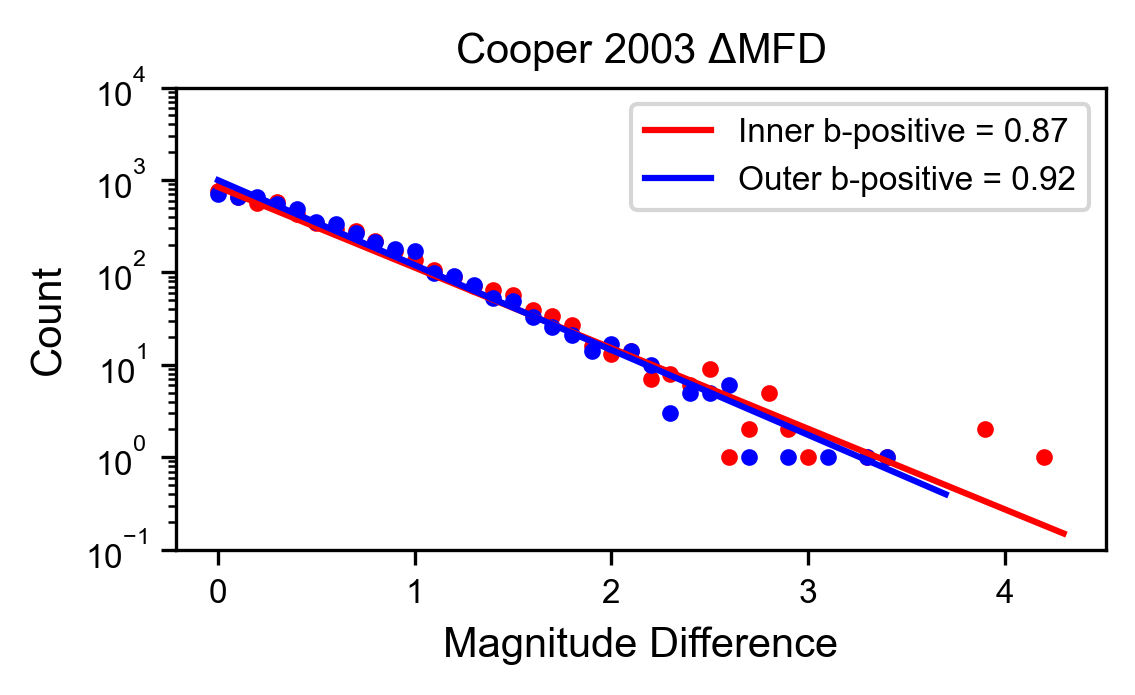

In [35]:
# Inner and Outer MFD for Matched Filter Basel 2006
inner=[]
outer=[]

for i in range(len(sDivs2[0])):
    inner.append(MNew[sDivs2[0][i]])
for i in range(len(sDivs2[1])):
    outer.append(MNew[sDivs2[1][i]])
    
bins = np.arange(-2, 6, 0.1)
bi, Mci, histi = b_value_functions.btrad(np.array(inner), bins, delta_b = 0.01)
bo, Mco, histo = b_value_functions.btrad(np.array(outer), bins, delta_b = 0.01)

histi1, bPi = b_value_functions.bpos(np.array(inner))
histo1, bPo = b_value_functions.bpos(np.array(outer))
print(bPi, bPo)



#x = hist1[1] yint = hist1[0][2] print(x,yint) best_fit = 10**(np.log10(yint)-bP*(x-0.2)) 

xi = histi1[1]
y_Mci = histi1[0][2]
best_fiti = 10**(np.log10(y_Mci)-bPi*(xi-0.2))

xo = histo1[1]
y_Mco = histo1[0][2]
best_fito = 10**(np.log10(y_Mco)-bPo*(xo-0.2))

# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 


fig, ax1 = plt.subplots(figsize=(4,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'

ax1.scatter(np.copy(histi1[1])[:-1], histi1[0], marker = '.',color='r')
ax1.plot(xi, best_fiti, label = 'Inner b-positive = '+str(np.round(bPi,2)),color='r')

ax1.scatter(np.copy(histo1[1])[:-1], histo1[0], marker = '.',color='b')
ax1.plot(xo, best_fito, label = 'Outer b-positive = '+str(np.round(bPo,2)),color='b')

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
ax1.set_xlabel('Magnitude Difference',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
ax1.set_title('Cooper 2003 $\Delta$MFD',fontsize=10)
plt.plot()
fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd/Cooper2003 IO DMFD.png',bbox_inches='tight', pad_inches=0.05)
# '/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd'

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3] 1215


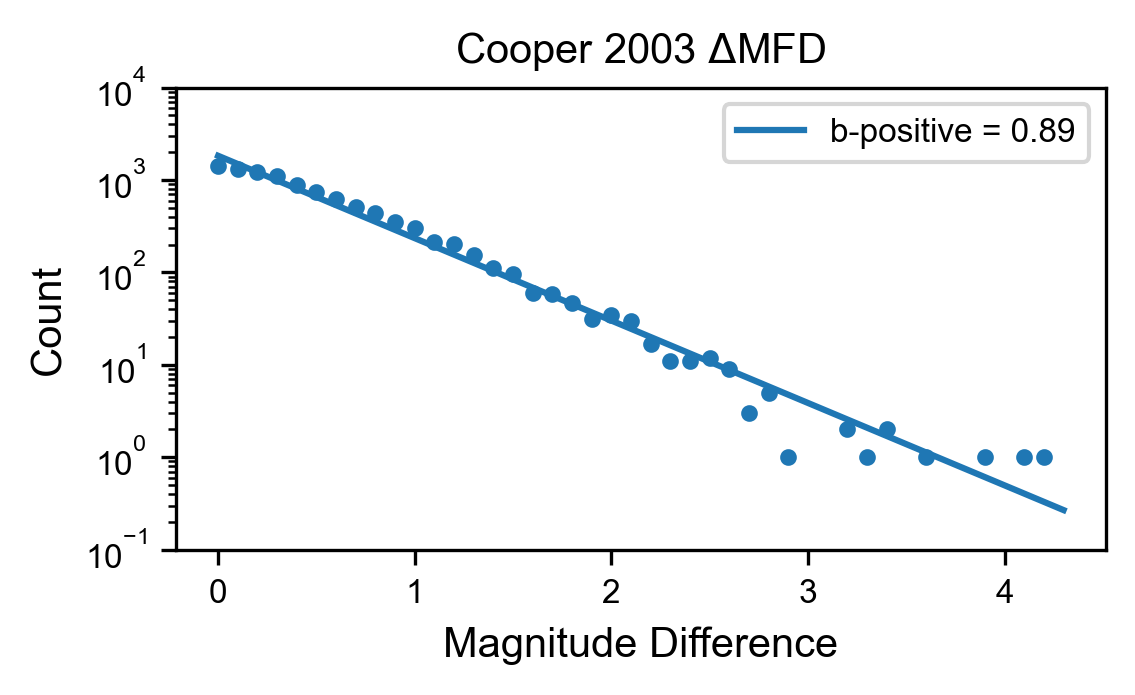

In [37]:
# Calculate b-value for the 'Mag_S' column 

hist1, bP = b_value_functions.bpos(MNew)

x = hist1[1]
yint = hist1[0][2]
print(x,yint)
#a = np.log10(yint) + b*Mc

best_fit = 10**(np.log10(yint)-bP*(x-0.2))


# calculate the midpoint of the bins so that the line/marker plots in the middle of the bin
# this is mostly a personal preference, you can use the upper or lower limits of the bins too 
#mid_bins = (bins[:-1] + bins[1:])/2

# Plot results 
fig, ax1 = plt.subplots(figsize=(4,2),dpi=300)
plt.rcParams['font.family'] = 'Arial'
hisP = np.copy(hist1[1])
hisP = hisP[:-1]
ax1.scatter(hisP, hist1[0], marker = '.')
ax1.plot(x, best_fit, label = 'b-positive = '+str(np.round(bP,2)))

#ax1.set_xlim([-1.5, 1.5])
ax1.set_ylim([10**-1, 10**4])

ax1.set_yscale('log')
ax1.legend(loc = 'upper right',fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

ax1.set_xlabel('Magnitude Difference',fontsize=10)
ax1.set_ylabel('Count',fontsize=10)
ax1.set_title('Cooper 2003 $\Delta$MFD',fontsize=10)
plt.plot()

fig.savefig(r'/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd/Cooper2003 DMFD.png',bbox_inches='tight', pad_inches=0.05)
# '/Users/mattpsa/Library/CloudStorage/OneDrive-UniversityofSouthernCalifornia/Yihe/Manuscripting/bpos dmfd'